# *Relatório de Análise de Dados de Imóveis*


## Importando dados

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('aluguel.csv', sep=';')

In [3]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


## *Informações Gerais*

In [5]:
dados.dtypes

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

In [6]:
tipos_de_dados = pd.DataFrame(dados.dtypes, columns = ["Tipo de Dado"])

In [7]:
tipos_de_dados.columns.name = "Variáveis"
tipos_de_dados

Variáveis,Tipo de Dado
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


In [8]:
dados.shape

(32960, 9)

In [9]:
print("A base de dados apresenta {} registros de imóveis com {} categorias de descrição".format(dados.shape[0], dados.shape[1]) )

A base de dados apresenta 32960 registros de imóveis com 9 categorias de descrição


In [10]:
tipo_de_imovel = dados.Tipo

In [11]:
tipo_de_imovel

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [12]:
tipo_de_imovel.drop_duplicates(inplace = True)

## Verificando imóveis por tipo

In [13]:
list(tipo_de_imovel)

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

In [14]:
residencial = ['Quitinete',
 'Casa',
 'Apartamento',
 'Casa de Condomínio',
 'Flat',
 'Casa de Vila']

In [15]:
imoveis_residenciais = dados[dados['Tipo'].isin(residencial)]

In [16]:
imoveis_residenciais.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [17]:
print("Existem {} Imóveis residenciais e {} não residenciais".format(imoveis_residenciais.shape[0], dados.shape[0]-imoveis_residenciais.shape[0]))

Existem 23056 Imóveis residenciais e 9904 não residenciais


In [18]:
imoveis_residenciais.index = range(imoveis_residenciais.shape[0])

In [19]:
imoveis_residenciais.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


## Tratando Dados Faltantes


In [20]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [21]:
dados.dropna(subset = ['Valor'], inplace = True)

In [22]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32943 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32943 non-null  object 
 1   Bairro      32943 non-null  object 
 2   Quartos     32943 non-null  int64  
 3   Vagas       32943 non-null  int64  
 4   Suites      32943 non-null  int64  
 5   Area        32943 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28854 non-null  float64
 8   IPTU        22716 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.5+ MB


In [23]:
#dados de condominio só são relevantes para apartamentos, 
#então outros tipos de imóveis que possuirem valor de condomínio nulo nao serão apagados do dataset
#terao o nulo substituido por 0

subset = (dados['Tipo'] == 'Apartamento') & (dados['Condominio'].isnull()) 

dados = dados[~subset]

dados.fillna(0, inplace = True)

In [24]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32198 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32198 non-null  object 
 1   Bairro      32198 non-null  object 
 2   Quartos     32198 non-null  int64  
 3   Vagas       32198 non-null  int64  
 4   Suites      32198 non-null  int64  
 5   Area        32198 non-null  int64  
 6   Valor       32198 non-null  float64
 7   Condominio  32198 non-null  float64
 8   IPTU        32198 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.5+ MB


## Novas Variaveis


In [25]:
#Calculando gasto total com alugel de um imovel

dados['Valor Total'] = dados.Condominio + dados.IPTU + dados.Valor
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Total
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0


In [26]:
#calculando valor por m2

dados['Valor Total por m2'] = (dados['Valor Total'] / dados['Area']).round(2)
dados.head()


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Total,Valor Total por m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0,68.87
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,80.67
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,21.46


## Estatisticas Gerais

In [27]:
bairrosfamosos = ['Barra da Tijuca', 'Copacabana', 'Lapa', 'Leblon', 'Botafogo', 'Ipanema', 'Centro']
selecao = dados['Bairro'].isin(bairrosfamosos)

bairros_famosos = dados[selecao]

In [28]:
grupo_bairro = bairros_famosos.groupby('Bairro')



In [29]:
#Custo médio de moradia e condominio por bairro

grupo_bairro[['Valor Total', 'Condominio']].mean().round(2)

,Valor Total,Condominio
Bairro,,
Barra da Tijuca,14071.68,3490.42
Botafogo,23474.63,2814.36
Centro,24890.30,4727.99
Copacabana,6129.29,1183.24
Ipanema,13614.10,2282.16
Lapa,3846.19,478.69
Leblon,14269.91,2246.48


In [30]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,6198.0,9035.20,30328.23,100.0,2000.0,3500.0,8000.0,738197.0
Botafogo,1356.0,19709.72,129879.42,299.0,2500.0,4000.0,11000.0,4500000.0
Centro,3253.0,19021.49,59397.57,90.0,1000.0,3750.0,15000.0,950000.0
Copacabana,3070.0,4514.54,6502.57,100.0,1900.0,3000.0,4900.0,198000.0
Ipanema,2197.0,10455.03,21002.14,100.0,4000.0,6900.0,12000.0,800000.0
Lapa,42.0,3218.98,5185.94,350.0,912.5,1598.5,2112.5,25000.0
Leblon,1459.0,11072.39,20830.80,100.0,4500.0,7000.0,11900.0,430000.0


In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize = (20, 10))

Text(0, 0.5, 'Valor')

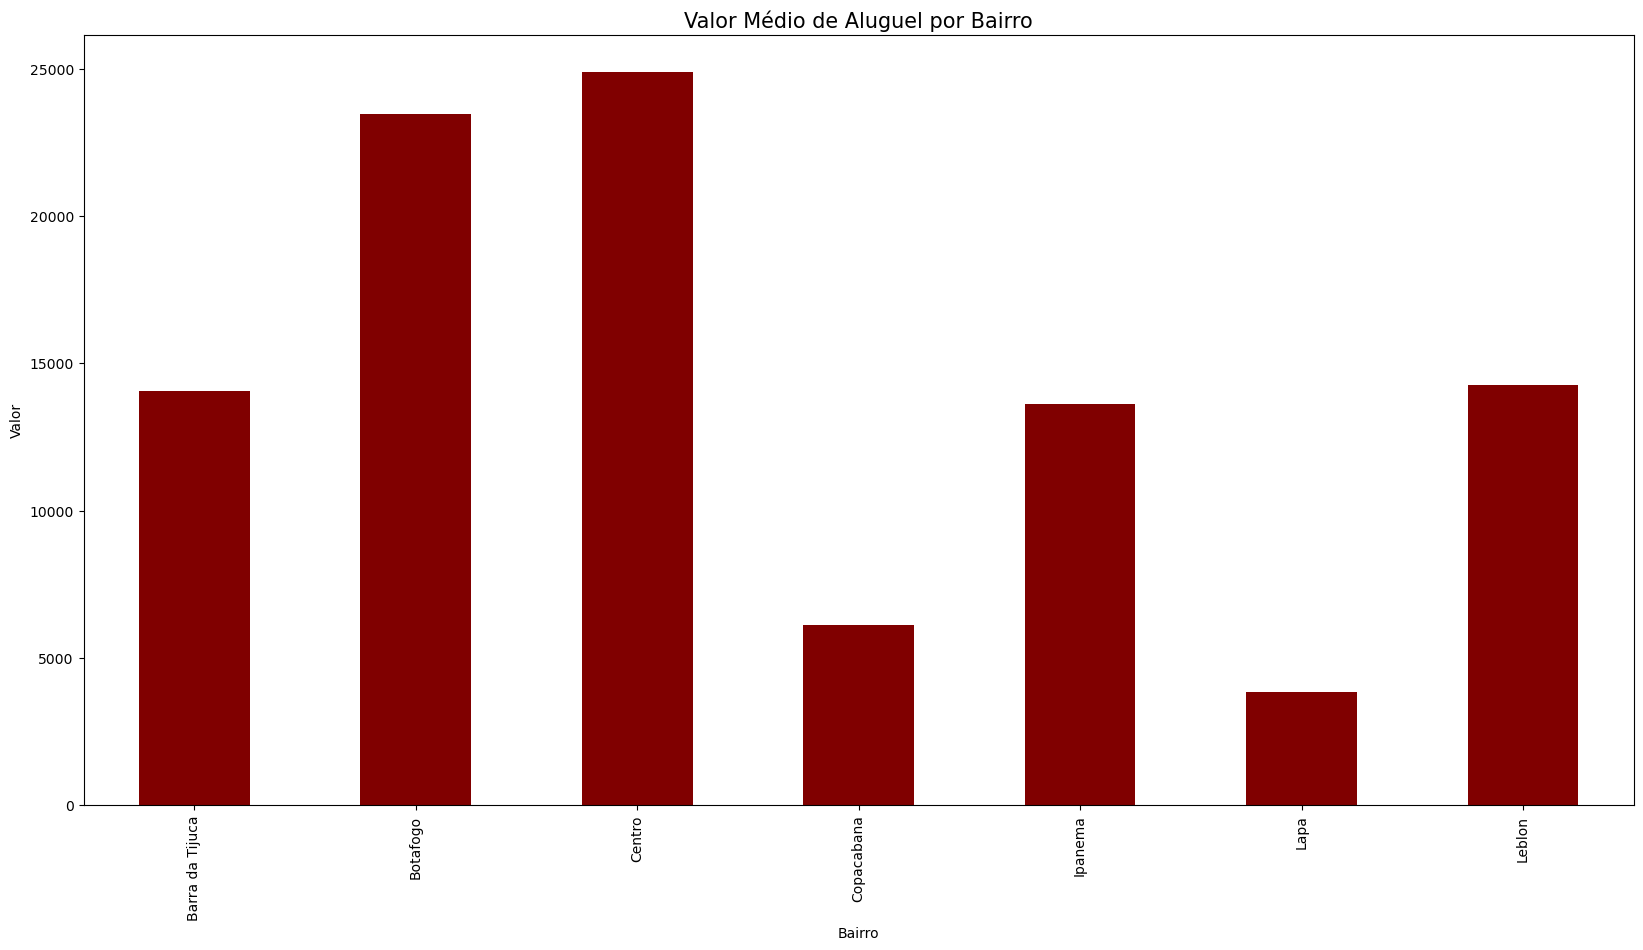

In [66]:
# Exibindo valores dos custo total de aluguel
fig = grupo_bairro['Valor Total'].mean().plot.bar(color = 'maroon')
fig.set_title("Valor Médio de Aluguel por Bairro", {'fontsize': 15})
fig.set_ylabel("Valor")

Text(0, 0.5, 'Valor')

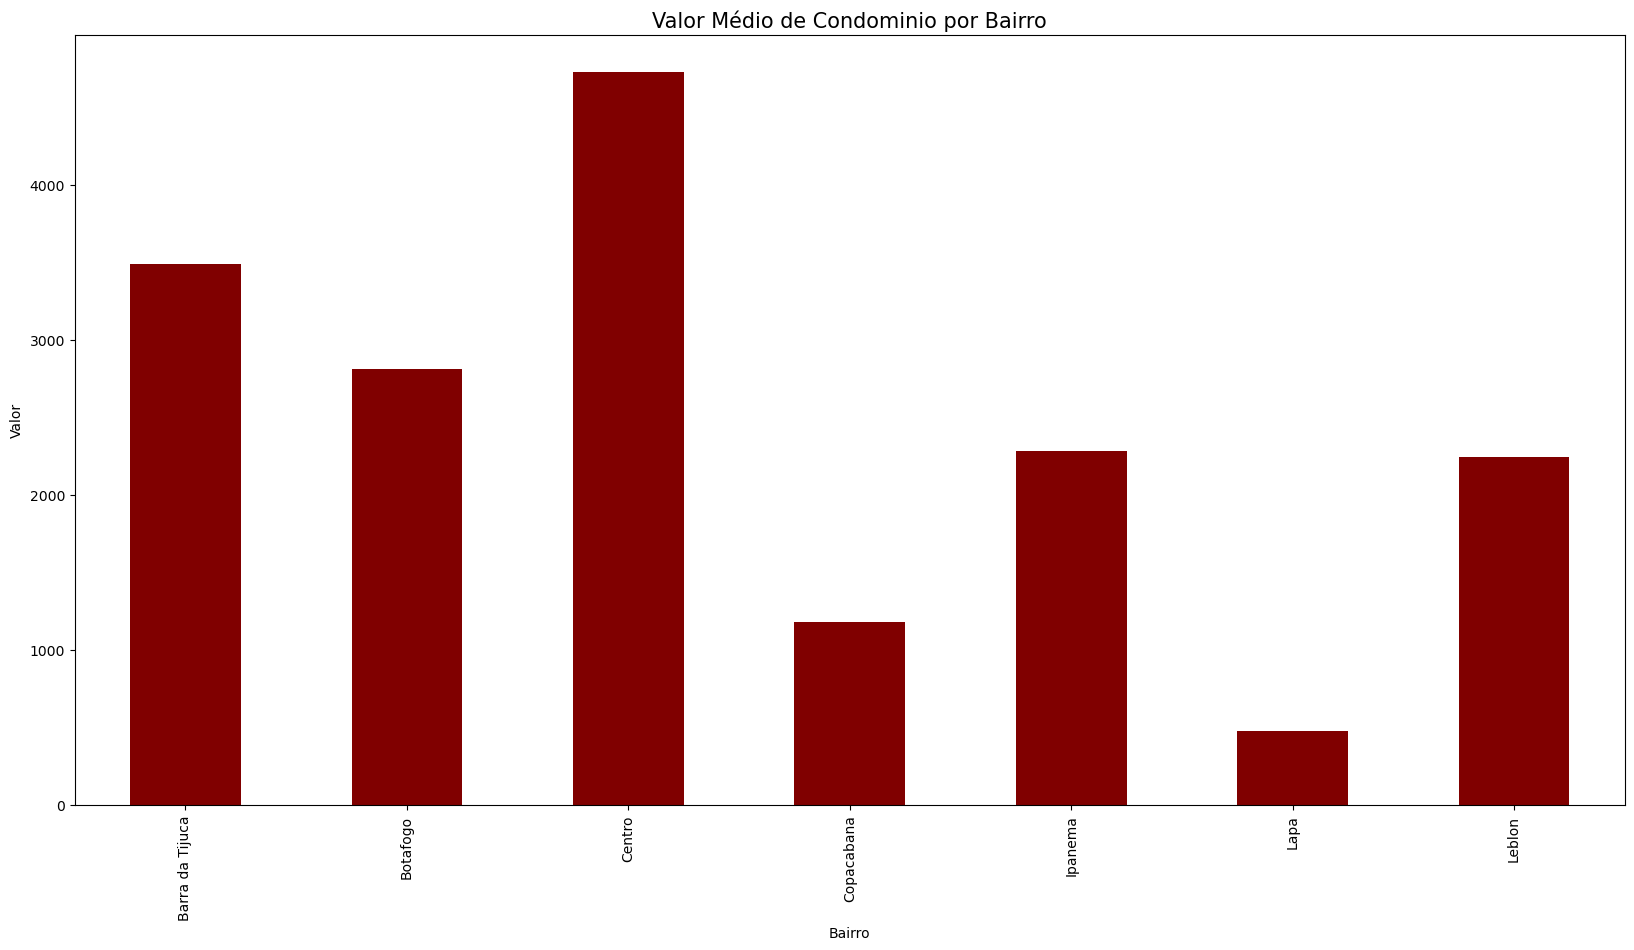

In [67]:
# Exibindo valores dos custo de condomínio
fig = grupo_bairro['Condominio'].mean().plot.bar(color = 'maroon')
fig.set_title("Valor Médio de Condominio por Bairro", {'fontsize': 15})
fig.set_ylabel("Valor")

Text(0, 0.5, 'Valor')

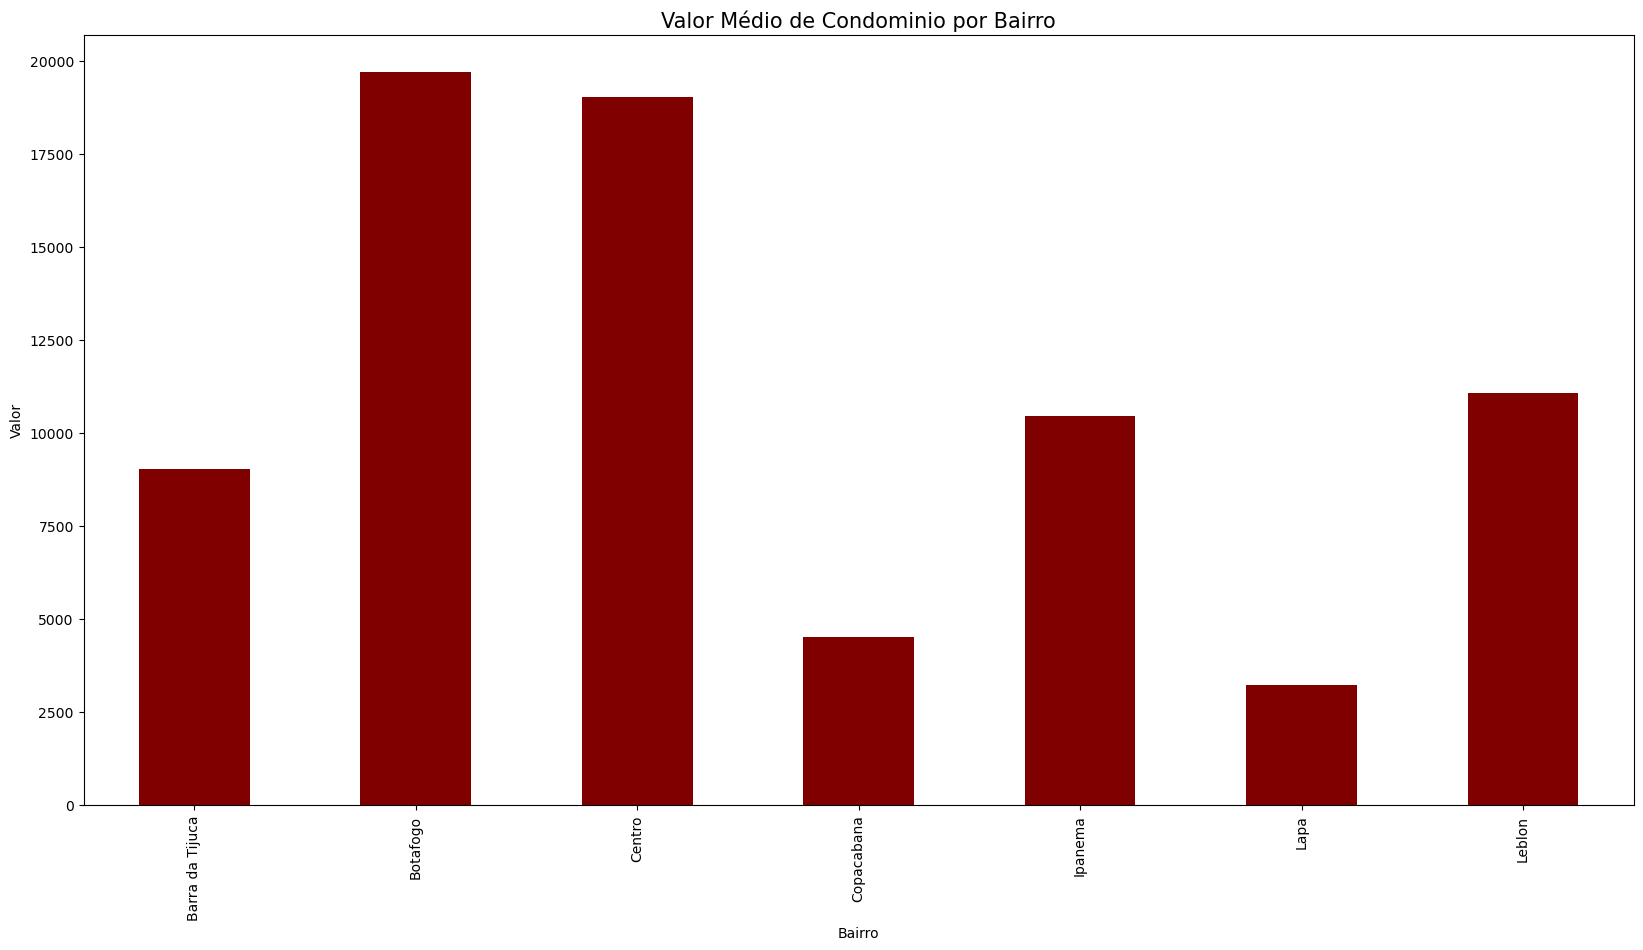

In [68]:
# Exibindo valores apenas do aluguel
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'maroon')
fig.set_title("Valor Médio de Condominio por Bairro", {'fontsize': 15})
fig.set_ylabel("Valor")

In [35]:
# Criando faixas de distribuições de quantidade de quartos

classes = [0, 2, 4, 6, 100 ]
labels = ['1 a 2 quartos', '3 a 4 quartos', '5 a 6 quartos', '7 ou mais quartos']

quartos = pd.cut(dados.Quartos, classes, labels = labels)
pd.value_counts(quartos)


1 a 2 quartos        11855
3 a 4 quartos         9715
5 a 6 quartos          706
7 ou mais quartos       85
Name: Quartos, dtype: int64


## Identificando e Removendo Outliers

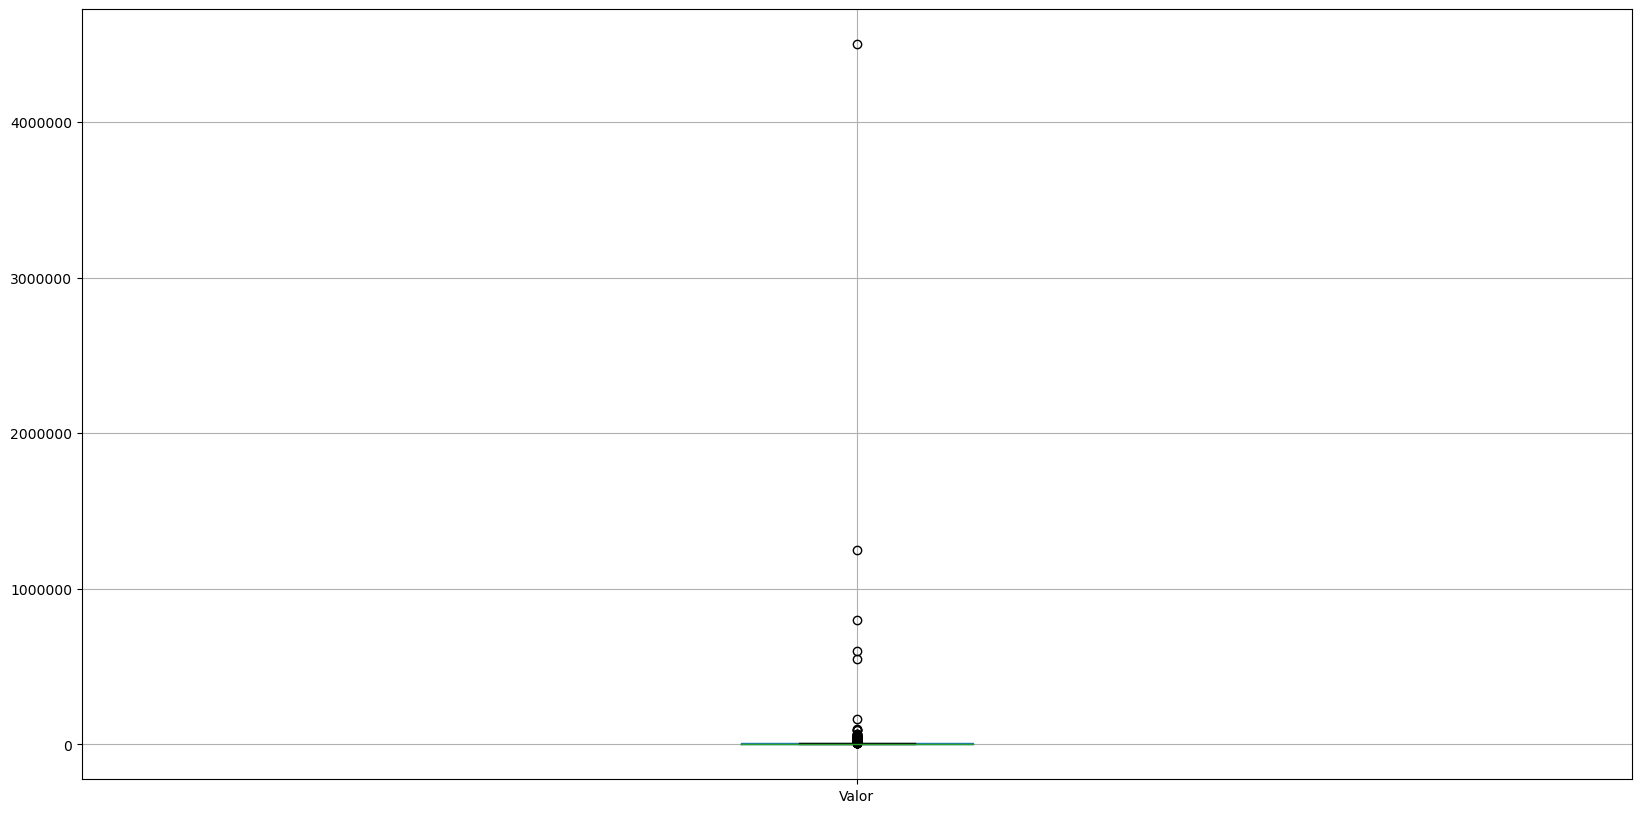

In [69]:
#Identificando e avaliando outliers em imoveis residenciais
tipo = ['Casa', 'Apartamento', 'Casa de Condomínio', 'Flat', 'Casa de Vila', 'Quitinete']

res = dados[dados['Tipo'].isin(tipo)]

res.boxplot(['Valor'])
plt.ticklabel_format(style='plain', axis='y')


In [70]:
res[res['Valor'] >= 100000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Total,Valor Total por m2
11712,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,601100.0,9247.69
16206,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,800900.0,4913.50
19256,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,551000.0,3673.33
21024,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,1251506.0,7494.05
23491,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,4501100.0,15003.67
29991,Apartamento,Leblon,3,1,2,450,100000.0,2400.0,0.0,102400.0,227.56
32357,Apartamento,Barra da Tijuca,4,3,4,403,160000.0,3714.0,2000.0,165714.0,411.20


<AxesSubplot:>

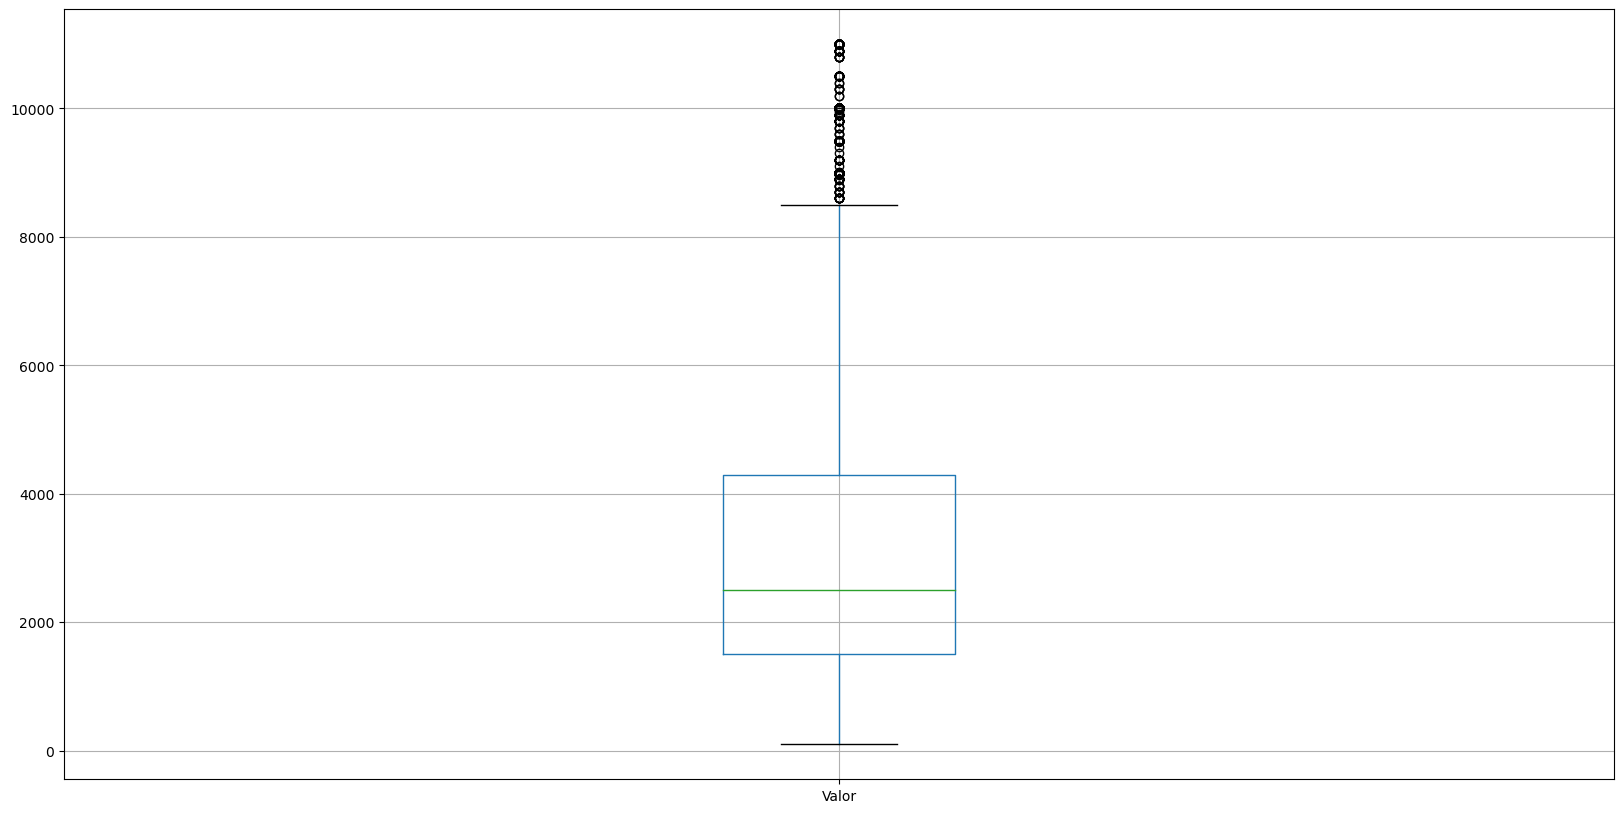

In [71]:
valor = res['Valor']

Q1 = valor.quantile(0.25)
Q3 = valor.quantile(0.75)
AIQ = Q3 - Q1

limite_inferior = Q1 - 1.5 * AIQ
limite_superior = Q3 + 1.5 * AIQ


selecao = (valor >= limite_inferior) & (valor <= limite_superior)

res_new = res[selecao]
res_new.boxplot(['Valor'])


array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

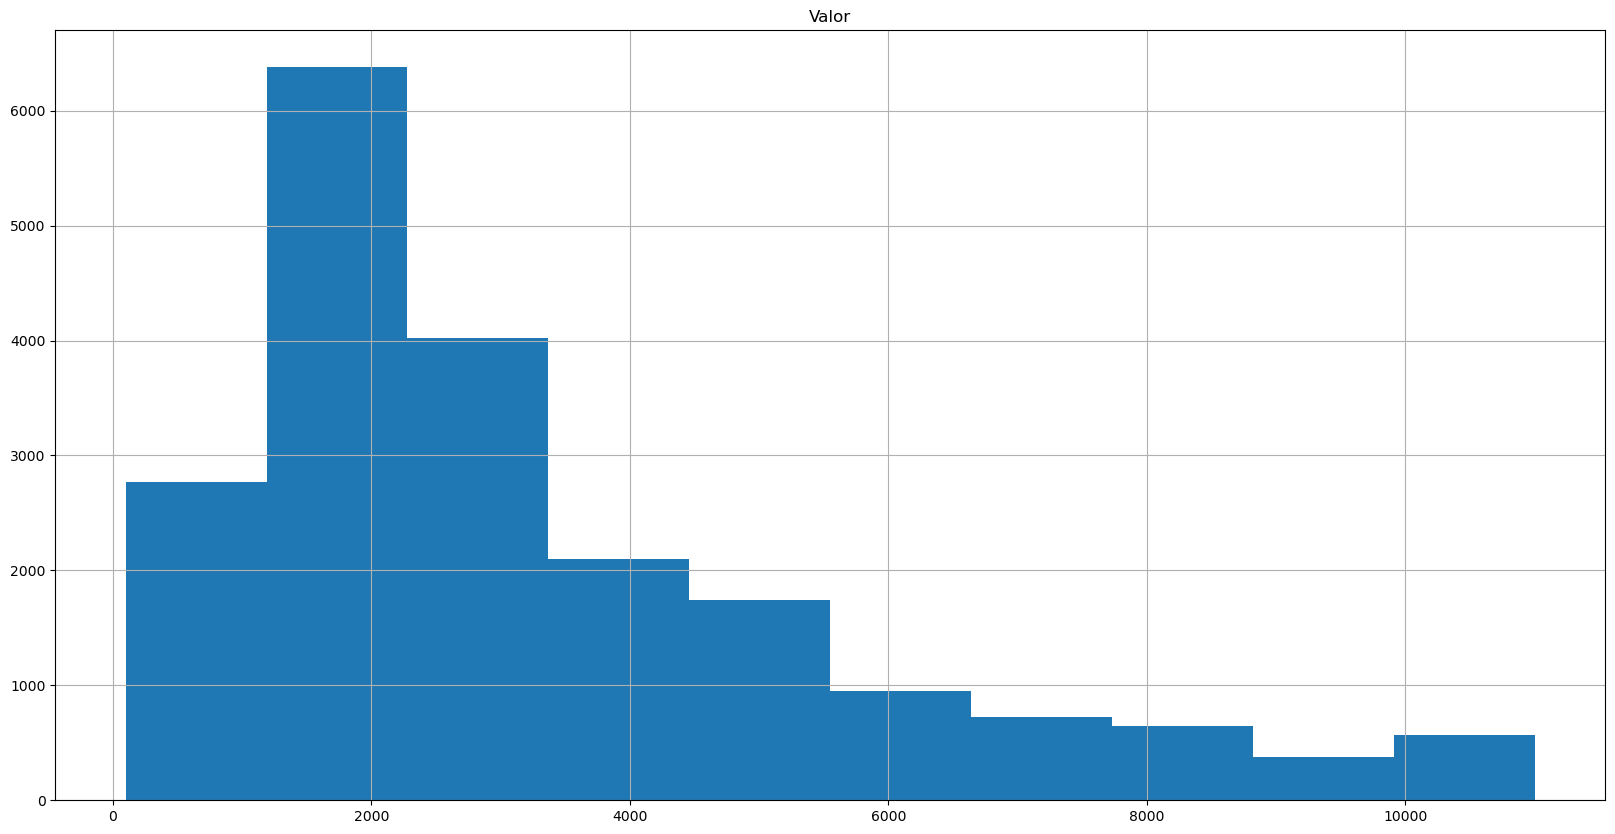

In [72]:
res_new.hist(['Valor'])

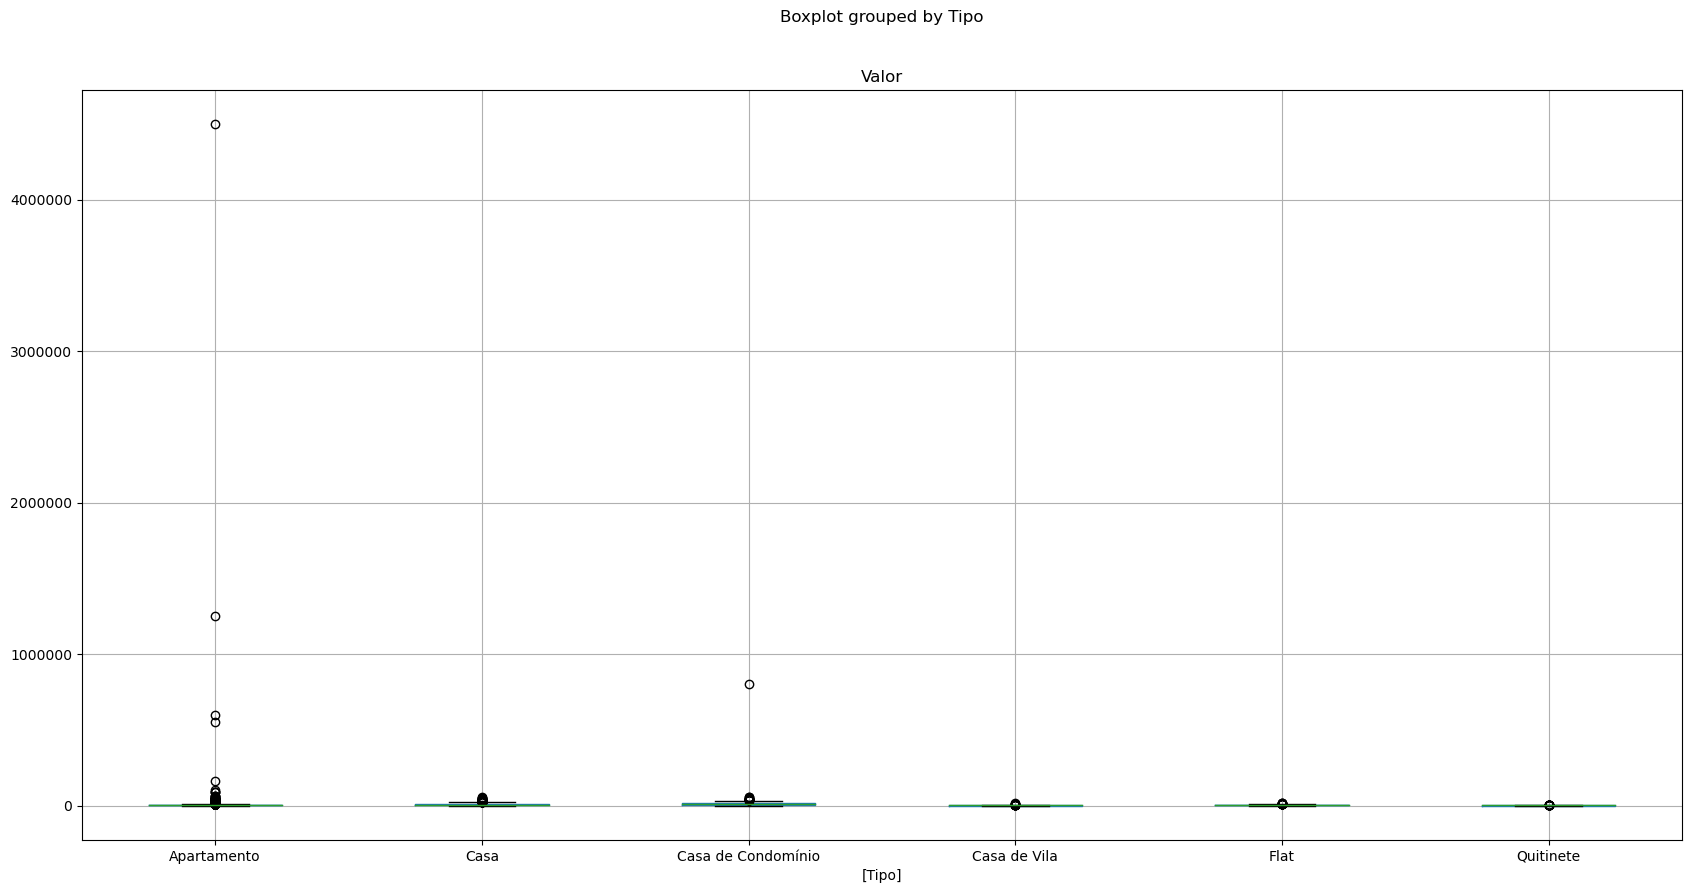

In [74]:
res.boxplot(['Valor'], by = ['Tipo'])
plt.ticklabel_format(style='plain', axis='y')

#Apartamento e Casa de condomínio possuem valores mais altos, no entanto é comum existirem casas de condominio 
# e apartamentos de alto nível, entao não é possível analisar sob o mesmo parâmetro de casa comum ou kitnet.
#vamos analisar por tipo de imovel


In [117]:
grupoTipo = dados.groupby('Tipo')['Valor']

In [118]:
Q1 = grupoTipo.quantile(0.25)
Q3 = grupoTipo.quantile(0.75)
AIQ = Q3 - Q1

limite_inferior = Q1 - 1.5 * AIQ
limite_superior = Q3 + 1.5 * AIQ



In [79]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Flat                  -2750.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [81]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Flat                  11250.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [141]:
dados_new = pd.DataFrame()

for tipo in grupoTipo.groups.keys():
    eh_tipo = res['Tipo'] == tipo
    eh_dentro_limite = (res['Valor'] >= limite_inferior[tipo]) & (res['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = res[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

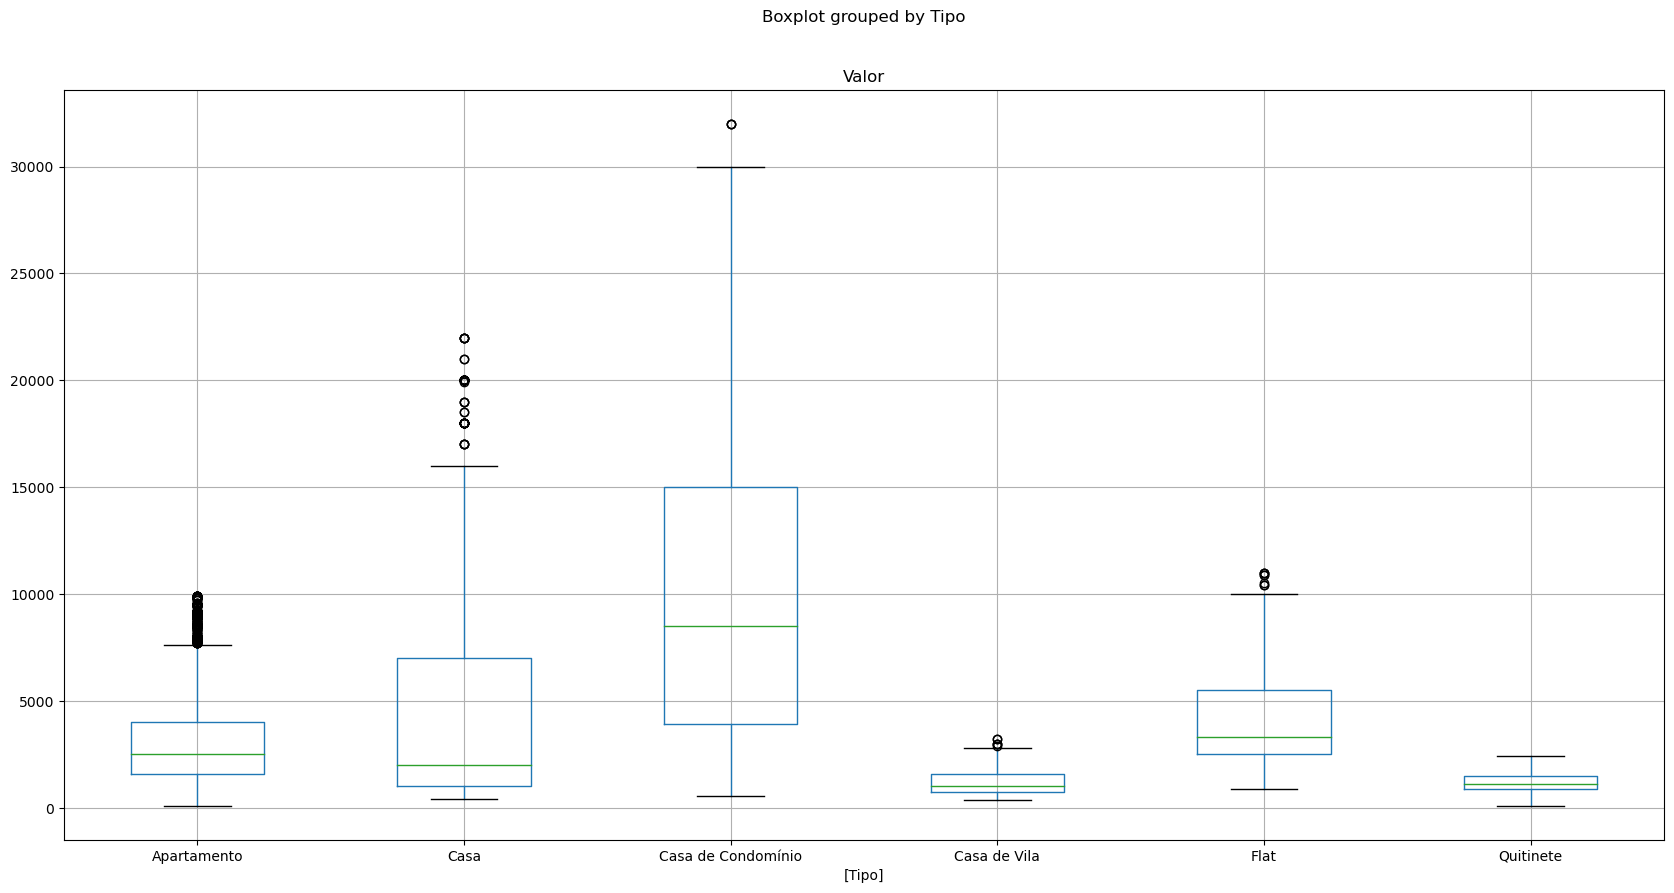

In [143]:
dados_new.boxplot(['Valor'], by=['Tipo'])

In [ ]:
.